# Predicting User Subscription Behavior in an EdTech Startup Using Logistic Regression and Business Intelligence Tools

**Business Question**: Can we predict a user’s subscription plan based on their profile, dancer type, learning goals, and genre interests?

**Context**: Understanding subscription behavior is critical to optimizing pricing, targeting, and retention strategies in ed-tech businesses. Your dataset, although lacking behavioral metrics, contains rich intent and user-type attributes. This makes it suitable for multiclass classification, user segmentation, and persona-based marketing strategy.

**Goal**: To develop a logistic regression-based classification model that predicts plan type (e.g., Basic, Standard, Full Access) based on user attributes and learning intent.

**Target Variable**: subscription_plan mapped to discrete categories: Basic, Full Access 7, Full Access 30, Full Access 180 & Full Access 365

# Tools & Libraries Used
- Python
- Pandas
- Numpy
- Matplotlib
- Seaborn
- Jupyter Notebook
- Snowflake
- Excel

## 1. Import Libraries & Load Data

In [1]:
import pandas as pd
import numpy as ny
import matplotlib.pyplot as plot
import seaborn as sns

In [2]:
pip install snowflake-connector-python

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install python-dotenv

Note: you may need to restart the kernel to use updated packages.


In [4]:
!pip install --upgrade snowflake-connector-python

In [ ]:
# Loading python-dotenv package and os module

# from dotenv import load_dotenv
# import os
# import snowflake.connector

# load_dotenv()

# conn = snowflake.connector.connect(
#    user = os.getenv('SNOWFLAKE_USER'),
#    password = os.getenv('SNOWFLAKE_PASSWORD'),
#    account = os.getenv('SNOWFLAKE_ACCOUNT'),
#    warehouse = os.getenv('SNOWFLAKE_WAREHOUSE'),
#    database = os.getenv('SNOWFLAKE_DATABASE'),
#   schema = os.getenv('SNOWFLAKE_SCHEMA')
#)

# query = 'SELECT * FROM idalsuserdatanew'
# df = pd.read_sql(query, conn)
# conn.close()

In [5]:
import socket

try:
    socket.create_connection(("FL38362.gcp-us-central1.gcp.snowflakecomputing.com", 443), timeout=10)
    print("✅ Successfully connected to Snowflake endpoint.")
except Exception as e:
    print("❌ Failed to connect:", e)


✅ Successfully connected to Snowflake endpoint.


### Insights:
* Due to connection issues with Snowflake Python connector from a GCP-hosted Business Critical account (FL38362), we opted for a secure manual export of the cleaned dataset for the modeling and EDA phase. All data transformations were performed in Snowflake using SQL before exporting to CSV. Further automation with Snowflake connection can be explored in production with enhanced firewall/VPN configurations.

In [6]:
# Loading dataset

df = pd.read_csv('IDALSUserDataCleaned.csv')

## 2. Exploratory Data Analysis

In [7]:
# Data preview

df.head(10)

,USER_ID,SUBSCRIPTION_PLAN,PLAN_EXPIRES_AT,LOCATION,COUNTRY,CREATED_AT,TYPE_OF_DANCER,GENRES_OF_INTEREST,PURPOSE_OF_LEARNING,FUTURE_ASPIRATIONS,FULL_NAME,SUBSCRIBED,SUBSCRIPTIONS,REPEATED_SUBSCRIBER
0,1,Free,NaN,"Bharuch, gujarat",India,1/1/2021 10:11,Advance,Multi Genre,Career,Freelancer or Professional Dancer,Viraj Suthar,NO,NaN,No
1,2,Free,NaN,Thane,India,1/1/2021 10:20,Beginner,Multi Genre,Career,Freelancer or Professional Dancer,Prarthana Pawar,NO,NaN,No
2,3,Free,NaN,Surat,India,1/1/2021 10:39,Intermediate,Single Genre,Passion,Others,Sandip Pariyar,NO,NaN,No
3,4,Free,NaN,Korba Chhattisgarh,India,1/1/2021 10:39,Intermediate,Multi Genre,Hobby,Choreographer,Harish Kanwar,NO,NaN,No
4,5,Free,NaN,Lonavla,India,1/1/2021 10:53,Intermediate,Single Genre,Hobby,Choreographer,Tanuj Mehta,NO,NaN,No
5,6,Free,NaN,Delhi,India,1/1/2021 10:55,Advance,Single Genre,Hobby,Art/Dance Director,Ankit Singh,NO,NaN,No
6,7,Free,NaN,Delhi,India,1/1/2021 10:59,Advance,Single Genre,Passion,Choreographer,Ankit Singh,NO,NaN,No
7,8,Free,NaN,Rajasthan,India,1/1/2021 11:16,Beginner,Single Genre,Passion,Instructor,Sachin Sharma,NO,NaN,No
8,9,Free,NaN,Trivandrum,India,1/1/2021 11:28,Beginner,Multi Genre,Hobby,Choreographer,Ajay Sm,NO,NaN,No
9,10,Free,NaN,Lucknow,India,1/1/2021 13:27,Intermediate,Multi Genre,Passion,Choreographer,Kumar Shivam,NO,NaN,No


In [8]:
# checking data types

df.dtypes

USER_ID                  int64
SUBSCRIPTION_PLAN       object
PLAN_EXPIRES_AT         object
LOCATION                object
COUNTRY                 object
CREATED_AT              object
TYPE_OF_DANCER          object
GENRES_OF_INTEREST      object
PURPOSE_OF_LEARNING     object
FUTURE_ASPIRATIONS      object
FULL_NAME               object
SUBSCRIBED              object
SUBSCRIPTIONS          float64
REPEATED_SUBSCRIBER     object
dtype: object

In [9]:
# changing column heads to lower case

df.columns = df.columns.str.lower()
df.columns

Index(['user_id', 'subscription_plan', 'plan_expires_at', 'location',
       'country', 'created_at', 'type_of_dancer', 'genres_of_interest',
       'purpose_of_learning', 'future_aspirations', 'full_name', 'subscribed',
       'subscriptions', 'repeated_subscriber'],
      dtype='object')

In [10]:
# changing data types of the columns 'plan_expires_at' and 'created_at' to datetime

df['plan_expires_at'] = pd.to_datetime(df['plan_expires_at'])
df['created_at'] = pd.to_datetime(df['created_at'])

In [11]:
df.dtypes

user_id                         int64
subscription_plan              object
plan_expires_at        datetime64[ns]
location                       object
country                        object
created_at             datetime64[ns]
type_of_dancer                 object
genres_of_interest             object
purpose_of_learning            object
future_aspirations             object
full_name                      object
subscribed                     object
subscriptions                 float64
repeated_subscriber            object
dtype: object

In [8]:
# checking for null values

df.isnull().sum()

user_id                    0
subscription_plan          0
plan_expires_at        11058
location                   0
country                    0
created_at                 0
type_of_dancer             0
genres_of_interest         0
purpose_of_learning        0
future_aspirations         0
full_name                  0
subscribed                 0
subscriptions          11173
repeated_subscriber        0
dtype: int64

### Insights:
* 11058 values are null indicating 11058 users were under FREE plan and did not opt for any subscription.
* 11173 users have zero subscriptions.

In [13]:
# value counts of categorical columns

print(df['subscription_plan'].value_counts())
print(df['type_of_dancer'].value_counts())
print(df['genres_of_interest'].value_counts())
print(df['purpose_of_learning'].value_counts())
print(df['future_aspirations'].value_counts())

subscription_plan
Free           11058
Monthly          956
Weekly           376
Yearly           123
Half Yearly       40
Name: count, dtype: int64
type_of_dancer
Intermediate    5909
Beginner        4596
Advance         2048
Name: count, dtype: int64
genres_of_interest
Multi Genre     8454
Single Genre    4099
Name: count, dtype: int64
purpose_of_learning
Passion    5302
Hobby      3641
Career     3610
Name: count, dtype: int64
future_aspirations
Choreographer                        4206
Freelancer or Professional Dancer    3356
Others                               3287
Instructor                            835
Art/Dance Director                    664
Dance Therapist                       205
Name: count, dtype: int64


In [10]:
print(df['country'].value_counts())

country
India                  11671
NEPAL                    228
UNITED STATES            140
BANGLADESH                89
PAKISTAN                  45
                       ...  
PANAMA                     1
ARGENTINA                  1
MYANMAR                    1
ICELAND                    1
ANTIGUA AND BARBUDA        1
Name: count, Length: 91, dtype: int64


In [14]:
df['country'].unique()

array(['India', 'BANGLADESH', 'UNITED STATES', 'NEW ZEALAND', 'GEORGIA',
       'COLOMBIA', 'NEPAL', 'PAKISTAN', 'UNITED KINGDOM', 'CANADA',
       'MALTA', 'SRI LANKA', 'OMAN', 'ALBANIA', 'UNITED ARAB EMIRATES',
       'BHUTAN', 'SINGAPORE', 'SWEDEN', 'KUWAIT', 'NETHERLANDS',
       'PHILIPPINES', 'VENEZUELA', 'UKRAINE', 'AUSTRALIA', 'GERMANY',
       'FRANCE', 'INDONESIA', 'ANGUILLA', 'AUSTRIA', 'AFGHANISTAN',
       'NAMIBIA', 'CHINA', 'MAURITIUS', 'United States',
       'United Arab Emirates', 'Indonesia', 'France', 'MALAYSIA',
       'CAMEROON', 'United Kingdom', 'Australia', 'ANDORRA', 'BAHRAIN',
       'ISRAEL', 'Nepal', 'ALGERIA', 'ITALY', 'IRAN, ISLAMIC REPUBLIC OF',
       'RUSSIAN FEDERATION', 'VIET NAM', 'BERMUDA', 'IRELAND',
       'KOREA REPUBLIC OF', 'SPAIN',
       'CONGO, THE DEMOCRATIC REPUBLIC OF THE', 'AZERBAIJAN',
       'NETHERLANDS ANTILLES', 'PANAMA', 'MALDIVES', 'ARGENTINA',
       'MYANMAR', 'ICELAND', 'SOMALIA', 'BRAZIL', 'NORWAY', 'JAPAN',
       'ISLE OF M

In [15]:
# Standardizing country names

df['country'] = df['country'].str.strip().str.lower().str.title()

In [16]:
df['country'].unique()

array(['India', 'Bangladesh', 'United States', 'New Zealand', 'Georgia',
       'Colombia', 'Nepal', 'Pakistan', 'United Kingdom', 'Canada',
       'Malta', 'Sri Lanka', 'Oman', 'Albania', 'United Arab Emirates',
       'Bhutan', 'Singapore', 'Sweden', 'Kuwait', 'Netherlands',
       'Philippines', 'Venezuela', 'Ukraine', 'Australia', 'Germany',
       'France', 'Indonesia', 'Anguilla', 'Austria', 'Afghanistan',
       'Namibia', 'China', 'Mauritius', 'Malaysia', 'Cameroon', 'Andorra',
       'Bahrain', 'Israel', 'Algeria', 'Italy',
       'Iran, Islamic Republic Of', 'Russian Federation', 'Viet Nam',
       'Bermuda', 'Ireland', 'Korea Republic Of', 'Spain',
       'Congo, The Democratic Republic Of The', 'Azerbaijan',
       'Netherlands Antilles', 'Panama', 'Maldives', 'Argentina',
       'Myanmar', 'Iceland', 'Somalia', 'Brazil', 'Norway', 'Japan',
       'Isle Of Man', 'Poland', 'Zimbabwe', 'Trinidad And Tobago',
       'Nigeria', 'American Samoa', 'Bolivia', 'Saudi Arabia', 'Fiji

In [17]:
df.duplicated().sum()

0

### Univariate Analysis

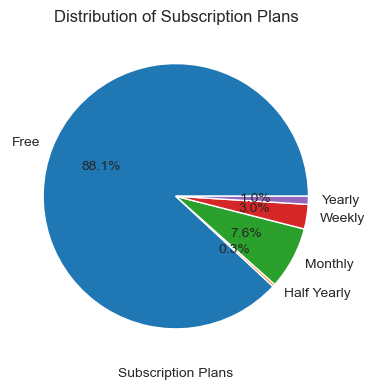

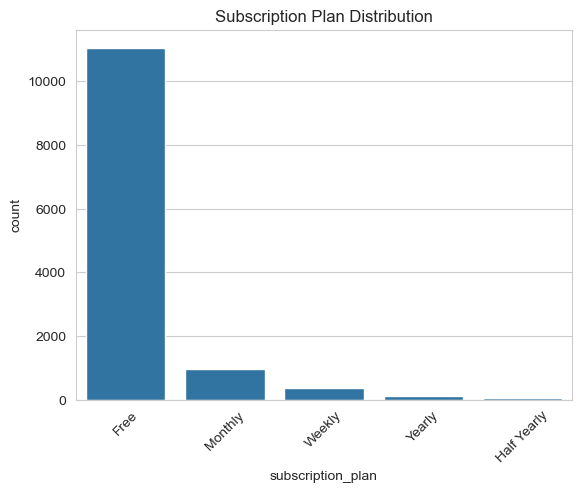

In [36]:
# checking ratio of subscription plan

plot.figure(figsize=(8,4))
df.groupby('subscription_plan')['user_id'].count().plot(kind = 'pie',
                                                      autopct = '%.1f%%')
plot.title('Distribution of Subscription Plans')
plot.xlabel('Subscription Plans')
plot.ylabel('')
plot.tight_layout()
plot.show()


sns.countplot(data=df, x='subscription_plan')
plot.xticks(rotation=45)
plot.title("Subscription Plan Distribution")
plot.show()

### Insights:
* A significant 88.1% of registered users did not subscribe to any paid plan, suggesting that many may have simply been browsing or exploring the platform without a strong purchase intent.
* This presents a clear opportunity for the sales and marketing teams to design targeted strategies aimed at converting these exploratory users into paying subscribers.
* Additionally, fewer than 2% of users chose half-yearly or yearly plans. Educating users on the cost-saving benefits of long-term subscriptions and highlighting the value they receive over time could help increase adoption of these plans, thereby boosting long-term revenue.

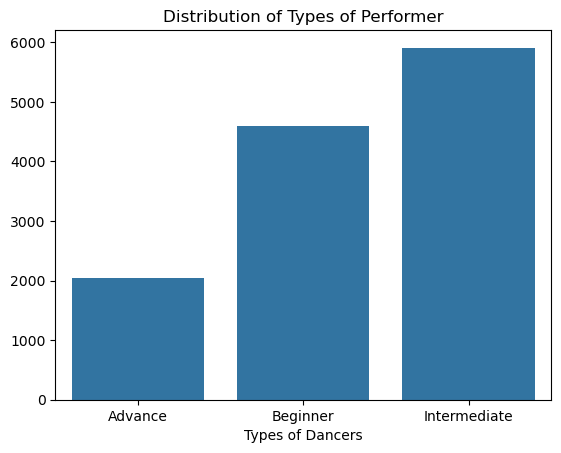

In [19]:
# Types of dancer distribution

sns.countplot(data=df, x='type_of_dancer')
plot.title('Distribution of Types of Performer')
plot.xlabel('Types of Dancers')
plot.ylabel('')
plot.show()

### Insights:
* Almost 6,000 registered users identified as intermediate dancers, reflecting a strong desire to sharpen their skills and advance their craft through the IDALS platform.
* More than 4,500 beginners signed up, demonstrating a genuine enthusiasm to start their dance journey. A major motivation could be the opportunity to learn directly from their favorite creators, making IDALS an attractive choice for first-time learners.

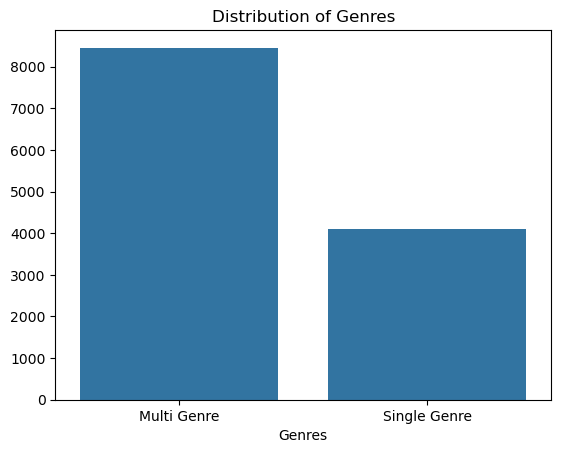

In [17]:
# distribution of genres

sns.countplot(data=df, x='genres_of_interest')
plot.title('Distribution of Genres')
plot.xlabel('Genres')
plot.ylabel('')
plot.show()

### Insights:
* More 8,000 registered users expressed interest in learning multiple dance genres, highlighting their strong enthusiasm and openness to exploring diverse dance styles.

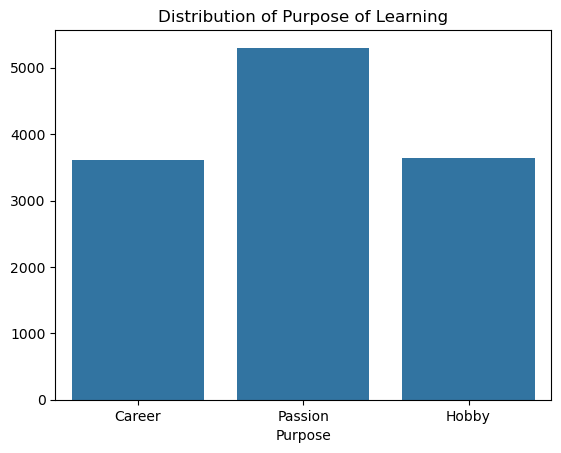

In [20]:
# distribution of purpose of learning

sns.countplot(data=df, x='purpose_of_learning')
plot.title('Distribution of Purpose of Learning')
plot.xlabel('Purpose')
plot.ylabel('')
plot.show()

### Insights:
* Almost 5,200 users registered on our platform with a clear passion for dance, reflecting a strong alignment with our core mission.
* More than 3,500 users identified dance as a hobby, suggesting that many of our users are likely professionals or working individuals seeking creative outlets or stress-relief activities.
* Interestingly, an almost equal number of users expressed career-driven intentions, indicating a growing interest in pursuing dance as a serious professional path.

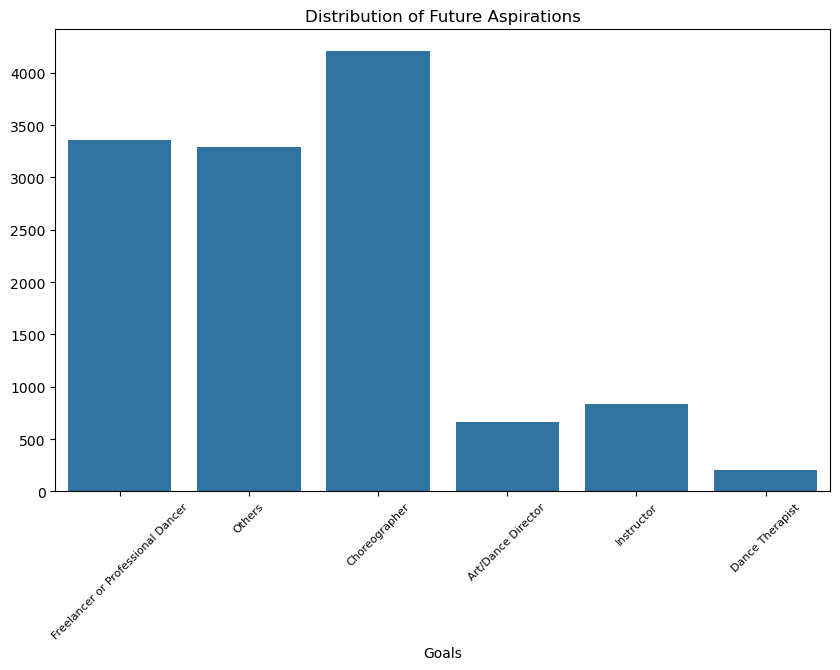

In [19]:
# distribution of future of aspirations

plot.figure(figsize=(10,6))
sns.countplot(data=df, x='future_aspirations')
plot.title('Distribution of Future Aspirations')
plot.xlabel('Goals')
plot.ylabel('')
plot.xticks(rotation=45, fontsize=8)
plot.show()

### Insights:
* Out of the total number of users, more than 4000 aspirants wished to become a **Choreographer** while less than 250 users wished to become a **Dance Therapist**. One of the reasons could be - Users may still not be aware of the field of dance therapy and how it is evolving with time. While this field is prominent in a country like United States, in a country like India, awareness needs to be built through workshops, classes or tie up with educational institutions.
* Almost 3,700 registered users wished to become a **Freelancer or Professional Dancer**.
* While **Others** accounted for the third highest number of users, these could be the users from various fields and may have chosen to learn Dance as a hobby or users who wish to get into acting where Dance is an important part of the overall skills of an artist.

### Bivariate or Multivariate Analysis

In [21]:
df.head(10)

,user_id,subscription_plan,plan_expires_at,location,country,created_at,type_of_dancer,genres_of_interest,purpose_of_learning,future_aspirations,full_name,subscribed,subscriptions,repeated_subscriber
0,1,Free,NaT,"Bharuch, gujarat",India,2021-01-01 10:11:00,Advance,Multi Genre,Career,Freelancer or Professional Dancer,Viraj Suthar,NO,NaN,No
1,2,Free,NaT,Thane,India,2021-01-01 10:20:00,Beginner,Multi Genre,Career,Freelancer or Professional Dancer,Prarthana Pawar,NO,NaN,No
2,3,Free,NaT,Surat,India,2021-01-01 10:39:00,Intermediate,Single Genre,Passion,Others,Sandip Pariyar,NO,NaN,No
3,4,Free,NaT,Korba Chhattisgarh,India,2021-01-01 10:39:00,Intermediate,Multi Genre,Hobby,Choreographer,Harish Kanwar,NO,NaN,No
4,5,Free,NaT,Lonavla,India,2021-01-01 10:53:00,Intermediate,Single Genre,Hobby,Choreographer,Tanuj Mehta,NO,NaN,No
5,6,Free,NaT,Delhi,India,2021-01-01 10:55:00,Advance,Single Genre,Hobby,Art/Dance Director,Ankit Singh,NO,NaN,No
6,7,Free,NaT,Delhi,India,2021-01-01 10:59:00,Advance,Single Genre,Passion,Choreographer,Ankit Singh,NO,NaN,No
7,8,Free,NaT,Rajasthan,India,2021-01-01 11:16:00,Beginner,Single Genre,Passion,Instructor,Sachin Sharma,NO,NaN,No
8,9,Free,NaT,Trivandrum,India,2021-01-01 11:28:00,Beginner,Multi Genre,Hobby,Choreographer,Ajay Sm,NO,NaN,No
9,10,Free,NaT,Lucknow,India,2021-01-01 13:27:00,Intermediate,Multi Genre,Passion,Choreographer,Kumar Shivam,NO,NaN,No


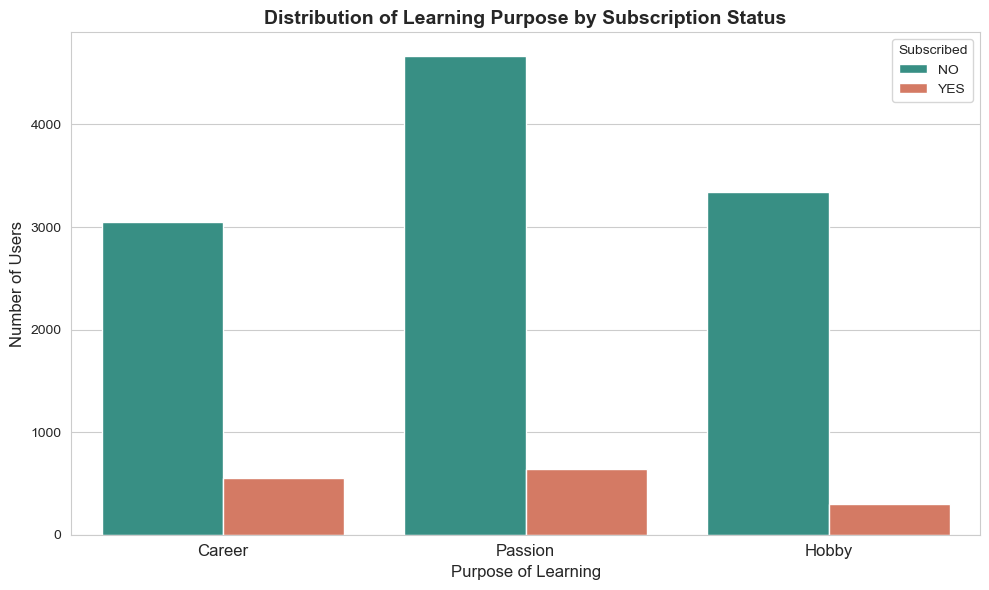

In [22]:
# Understanding the distribution between purpose of learning and subscription status

plot.figure(figsize=(10, 6))
sns.set_style("whitegrid")

colors = ['#2a9d8f', '#e76f51'] 

sns.countplot(
    data=df,
    x='purpose_of_learning',
    hue='subscribed',
    palette=colors
)

plot.title('Distribution of Learning Purpose by Subscription Status', fontsize=14, fontweight='bold')
plot.xlabel('Purpose of Learning', fontsize=12)
plot.ylabel('Number of Users', fontsize=12)
plot.xticks(rotation=0, fontsize=12)
plot.legend(title='Subscribed', title_fontsize='10', fontsize='10')
plot.tight_layout()
plot.show()

### Insights:
* Although the proportion of non-subscribed users is high across all three learning purposes, our primary focus is on the behavior of subscribed users.
* A higher share of subscribed users fall under the career and passion categories compared to those who joined as a hobby.
* This suggests that users with career or passion-driven motivations are more likely to invest in a subscription, aligning their intent with actionable commitment.

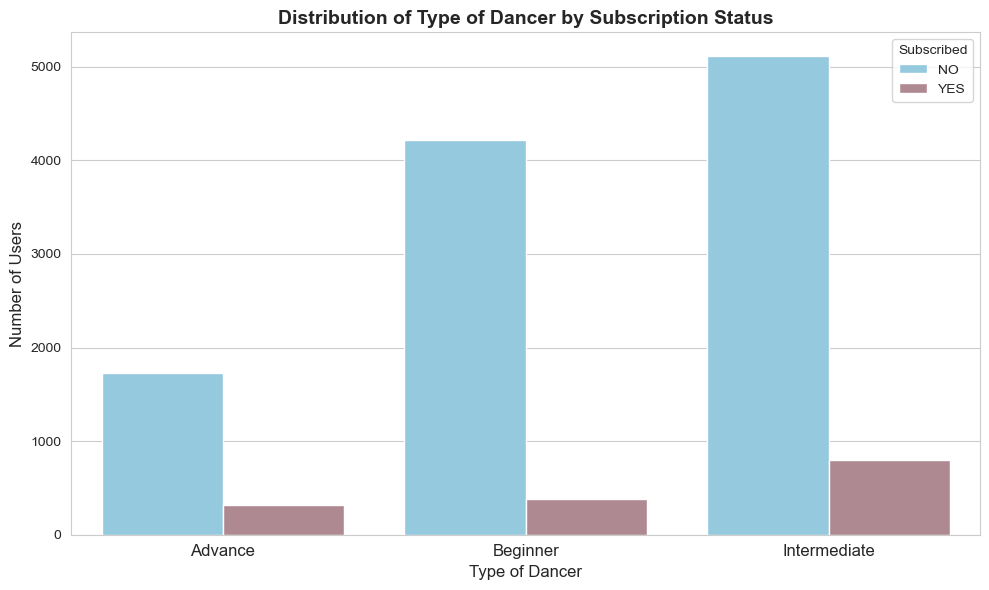

In [23]:
# Understanding the distribution between type of dancer and subscription status

plot.figure(figsize=(10, 6))
sns.set_style("whitegrid")

colors = ['#87ceeb', '#b5838d'] 

sns.countplot(
    data=df,
    x='type_of_dancer',
    hue='subscribed',
    palette=colors
)

plot.title('Distribution of Type of Dancer by Subscription Status', fontsize=14, fontweight='bold')
plot.xlabel('Type of Dancer', fontsize=12)
plot.ylabel('Number of Users', fontsize=12)
plot.xticks(rotation=0, fontsize=12)
plot.legend(title='Subscribed', title_fontsize='10', fontsize='10')
plot.tight_layout()
plot.show()

### Insights:
* A significantly higher number of subscribed users identify as intermediate dancers compared to beginners or advanced dancers.
* This indicates that intermediate-level dancers are more inclined to invest in subscriptions to refine and elevate their skills further as artists.

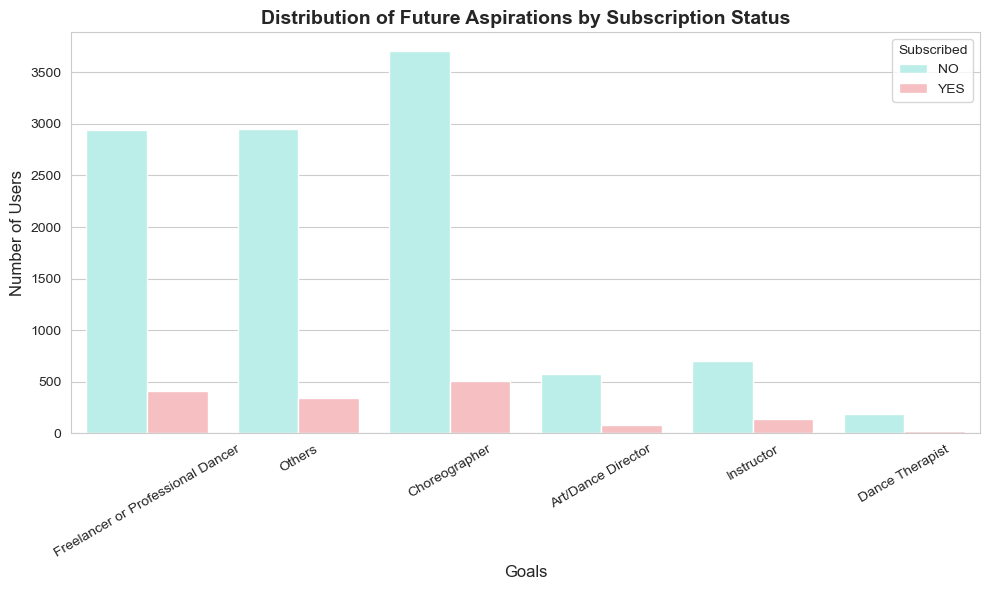

In [24]:
# Understanding the distribution between future aspirations and subscription status

plot.figure(figsize=(10, 6))
sns.set_style("whitegrid")

colors = ['#b2f7ef', '#ffb6b9'] 

sns.countplot(
    data=df,
    x='future_aspirations',
    hue='subscribed',
    palette=colors
)

plot.title('Distribution of Future Aspirations by Subscription Status', fontsize=14, fontweight='bold')
plot.xlabel('Goals', fontsize=12)
plot.ylabel('Number of Users', fontsize=12)
plot.xticks(rotation=30, fontsize=10)
plot.legend(title='Subscribed', title_fontsize='10', fontsize='10')
plot.tight_layout()
plot.show()

### Insights:
* The highest number of subscribed users aspired to become **Choreographers**, highlighting this as the most popular career goal among our audience.
* A considerable number of subscribers also identified their goals as becoming **Professional Dancers** or fell into the **Others** category, suggesting a strong intent among users to actively pursue careers in the dance industry.
* Fewer subscribed users indicated goals such as **Art/Dance Director**, **Instructor**, or **Dance Therapist**. This may be attributed to the platform's focus on performance-based content, with limited or no offerings related to direction, teaching, or therapy.
* Notably, teaching-oriented courses were primarily offered through offline sessions, which might have limited their accessibility to a wider audience.

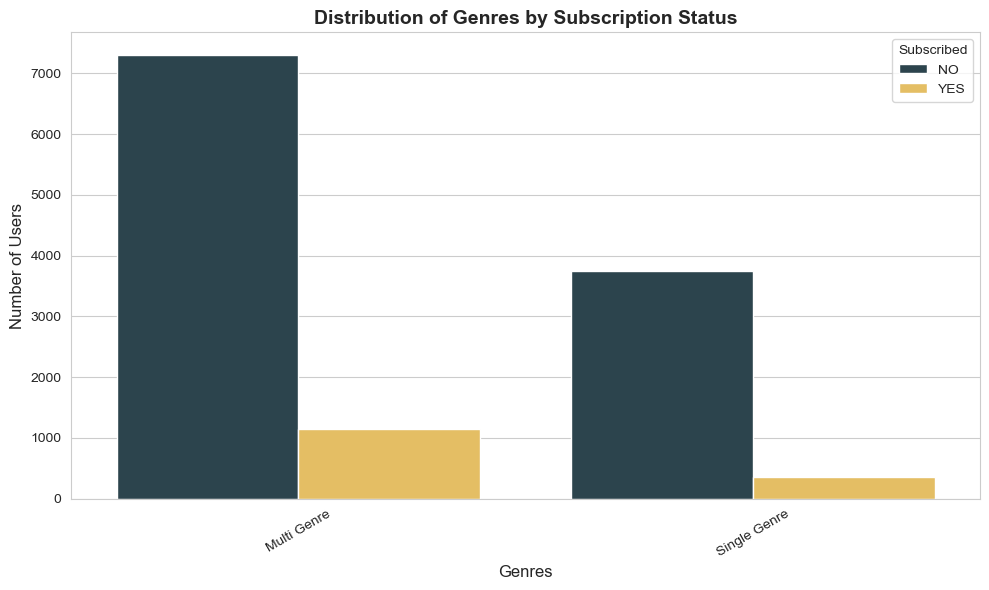

In [25]:
# Understanding the distribution between genres of interest and subscription status

plot.figure(figsize=(10, 6))
sns.set_style("whitegrid")

colors = ['#264653', '#f9c74f'] 

sns.countplot(
    data=df,
    x='genres_of_interest',
    hue='subscribed',
    palette=colors
)

plot.title('Distribution of Genres by Subscription Status', fontsize=14, fontweight='bold')
plot.xlabel('Genres', fontsize=12)
plot.ylabel('Number of Users', fontsize=12)
plot.xticks(rotation=30, fontsize=10)
plot.legend(title='Subscribed', title_fontsize='10', fontsize='10')
plot.tight_layout()
plot.show()

### Insights:
* The number of subscribed users interested in learning multiple dance genres was significantly higher than those focused on a single genre, reflecting a strong enthusiasm for versatility and diverse skill development among learners.

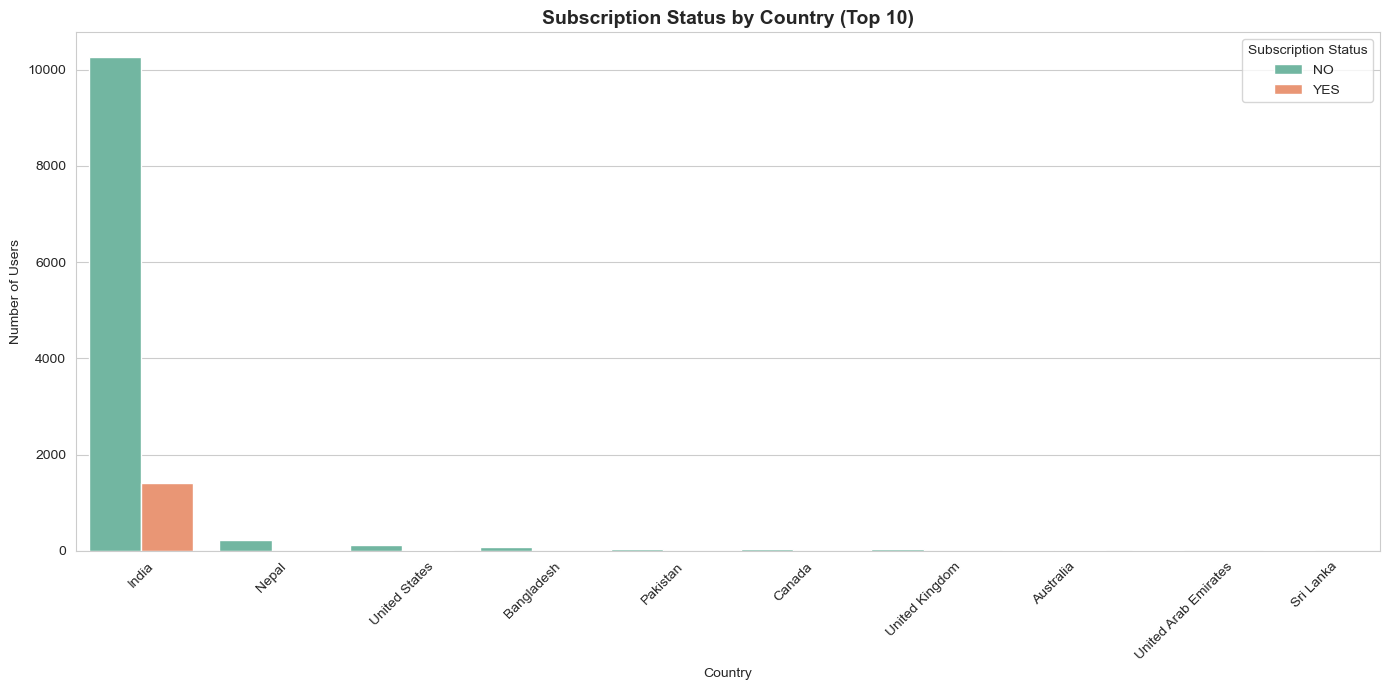

In [26]:
# understanding the distribution between country and subscription status

top_countries = df['country'].value_counts().head(10).index.tolist()
filtered_df = df[df['country'].isin(top_countries)]

plot.figure(figsize=(14, 7))
sns.set_style("whitegrid")

sns.countplot(
    data=filtered_df,
    x='country',
    hue='subscribed',
    palette='Set2',
    order=top_countries
)

plot.title('Subscription Status by Country (Top 10)', fontsize=14, fontweight='bold')
plot.xlabel('Country')
plot.ylabel('Number of Users')
plot.xticks(rotation=45)
plot.legend(title='Subscription Status')
plot.tight_layout()
plot.show()

### Insights:
* The majority of subscribed users are from India, indicating a strong domestic user base.
* Subscribed users from other countries are minimal or nearly absent, suggesting limited international conversions despite global registrations.

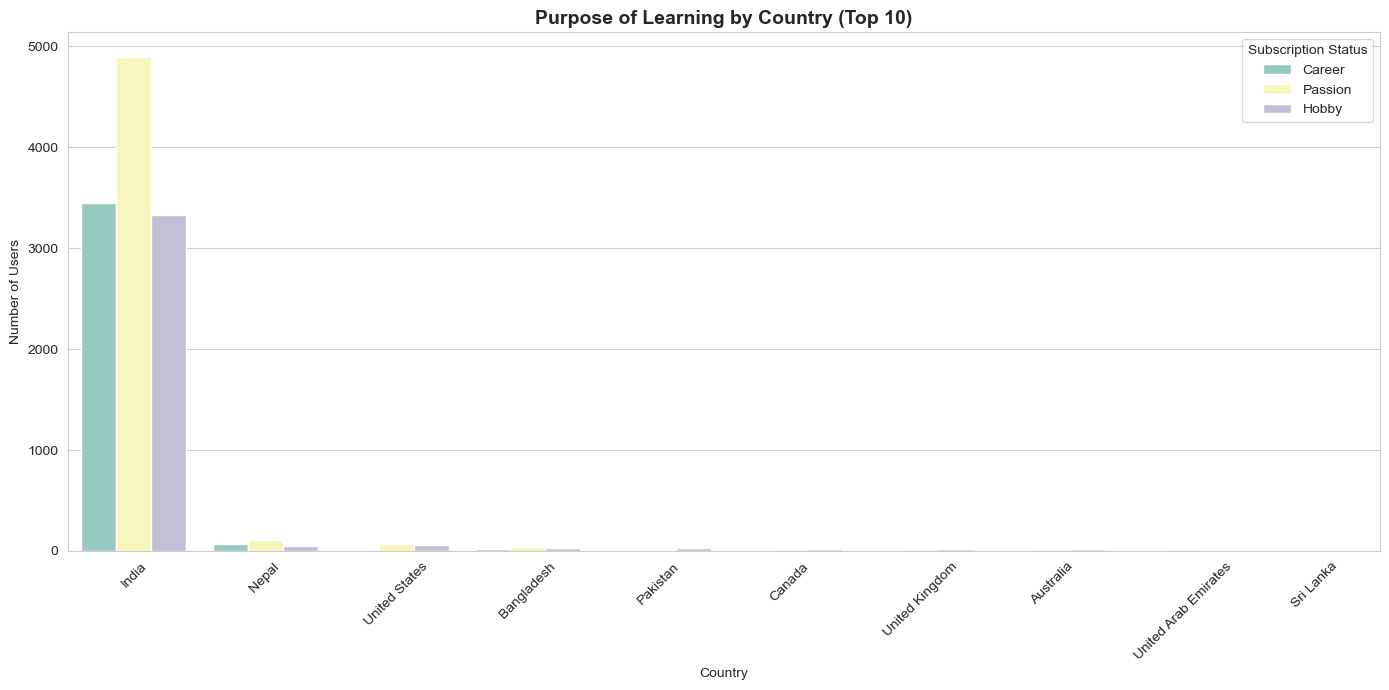

In [27]:
# understanding the distribution between country and purpose of learning

top_countries = df['country'].value_counts().head(10).index.tolist()
filtered_df = df[df['country'].isin(top_countries)]

plot.figure(figsize=(14, 7))
sns.set_style("whitegrid")

sns.countplot(
    data=filtered_df,
    x='country',
    hue='purpose_of_learning',
    palette='Set3',
    order=top_countries
)

plot.title('Purpose of Learning by Country (Top 10)', fontsize=14, fontweight='bold')
plot.xlabel('Country')
plot.ylabel('Number of Users')
plot.xticks(rotation=45)
plot.legend(title='Subscription Status')
plot.tight_layout()
plot.show()

## Insights:
* Across all countries, passion emerges as the most common reason users registered on the IDALS platform.
* This strong inclination toward passion-driven learning is notably evident even in countries like Zimbabwe, Nepal, and the United States, highlighting the platform’s emotional resonance with a global audience.

In [28]:
# data preview

df.head(10)

,user_id,subscription_plan,plan_expires_at,location,country,created_at,type_of_dancer,genres_of_interest,purpose_of_learning,future_aspirations,full_name,subscribed,subscriptions,repeated_subscriber
0,1,Free,NaT,"Bharuch, gujarat",India,2021-01-01 10:11:00,Advance,Multi Genre,Career,Freelancer or Professional Dancer,Viraj Suthar,NO,NaN,No
1,2,Free,NaT,Thane,India,2021-01-01 10:20:00,Beginner,Multi Genre,Career,Freelancer or Professional Dancer,Prarthana Pawar,NO,NaN,No
2,3,Free,NaT,Surat,India,2021-01-01 10:39:00,Intermediate,Single Genre,Passion,Others,Sandip Pariyar,NO,NaN,No
3,4,Free,NaT,Korba Chhattisgarh,India,2021-01-01 10:39:00,Intermediate,Multi Genre,Hobby,Choreographer,Harish Kanwar,NO,NaN,No
4,5,Free,NaT,Lonavla,India,2021-01-01 10:53:00,Intermediate,Single Genre,Hobby,Choreographer,Tanuj Mehta,NO,NaN,No
5,6,Free,NaT,Delhi,India,2021-01-01 10:55:00,Advance,Single Genre,Hobby,Art/Dance Director,Ankit Singh,NO,NaN,No
6,7,Free,NaT,Delhi,India,2021-01-01 10:59:00,Advance,Single Genre,Passion,Choreographer,Ankit Singh,NO,NaN,No
7,8,Free,NaT,Rajasthan,India,2021-01-01 11:16:00,Beginner,Single Genre,Passion,Instructor,Sachin Sharma,NO,NaN,No
8,9,Free,NaT,Trivandrum,India,2021-01-01 11:28:00,Beginner,Multi Genre,Hobby,Choreographer,Ajay Sm,NO,NaN,No
9,10,Free,NaT,Lucknow,India,2021-01-01 13:27:00,Intermediate,Multi Genre,Passion,Choreographer,Kumar Shivam,NO,NaN,No


In [52]:
# exporting the file

df.to_csv('cleaned_user_data.csv', index=False)

In [29]:
df.shape

(12553, 14)

In [31]:
df['subscriptions'].value_counts().sort_values(ascending=False)

subscriptions
1.0     1057
2.0      205
3.0       63
4.0       23
5.0       13
7.0        6
6.0        4
10.0       3
8.0        2
14.0       1
12.0       1
11.0       1
23.0       1
Name: count, dtype: int64

In [33]:
top_subscribers = df.groupby('full_name')['subscriptions'].max().sort_values(ascending=False).head(10)
print(top_subscribers)


full_name
Suraj Rauthan        23.0
Meghali Gandhi       14.0
Saksham Gupta        12.0
Dr.Arindam Laskar    11.0
Jiya Mistry          10.0
Sahil Kalebag        10.0
Ameeta Vagadia       10.0
Jiya Thakur           8.0
Chinmay Lokare        8.0
Anil Ani              7.0
Name: subscriptions, dtype: float64


### Insights:
* Users with more than five subscriptions demonstrate strong loyalty and a deep appreciation for the content offered by IDALS.
* These highly engaged users represent a valuable segment and could be rewarded with exclusive benefits—such as discounts on offline courses or access to specialized online training programs—acknowledging their commitment and intent to grow in the field of dance.

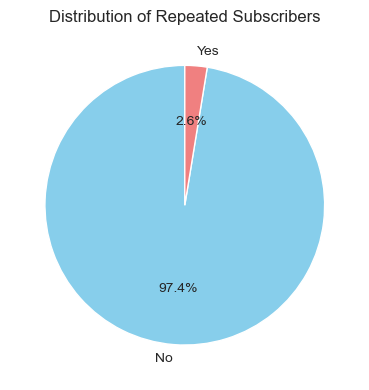

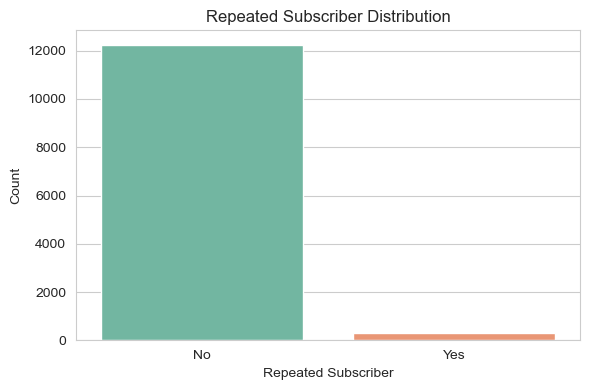

In [40]:
# Pie chart for repeated subscriber distribution
plot.figure(figsize=(8, 4))
df['repeated_subscriber'].value_counts().plot(
    kind='pie',
    autopct='%.1f%%',
    startangle=90,
    colors=['skyblue', 'lightcoral']  
                 
)
plot.title('Distribution of Repeated Subscribers')
plot.ylabel('')
plot.tight_layout()
plot.show()

# Count plot
plot.figure(figsize=(6, 4))
sns.countplot(data=df, x='repeated_subscriber', hue='repeated_subscriber', palette='Set2')
plot.title('Repeated Subscriber Distribution')
plot.xlabel('Repeated Subscriber')
plot.ylabel('Count')
plot.xticks(rotation=0)
plot.tight_layout()
plot.show()

### Insights:
* Only 2.6% of the total users were repeated subscribers.
* However, this still translates to 326 highly engaged learners who returned to IDALS for additional subscriptions — reflecting their strong interest and trust in the platform.

In [42]:
subscribed_once = df[df['subscriptions'] == 1]
print(f"Number of users who subscribed only once: {subscribed_once.shape[0]}")

Number of users who subscribed only once: 1057


### Insights:
* A total of **1,057** users subscribed only once to IDALS.
* This presents a valuable opportunity for the customer relationship team to personally reach out and understand the reasons behind their decision not to renew.
* Gathering their feedback could offer meaningful insights into areas of improvement for the platform’s content, experience, and services—ultimately helping IDALS enhance user retention and satisfaction.

### Time-Series Analysis

In [50]:
# time series analysis

df['signup_month'] = df['created_at'].dt.to_period('M').astype(str)
df['subscription_end'] = df['plan_expires_at'].dt.to_period('M').astype(str)


<Axes: title={'center': 'Monthly New User Signups'}, xlabel='Month', ylabel='Users'>

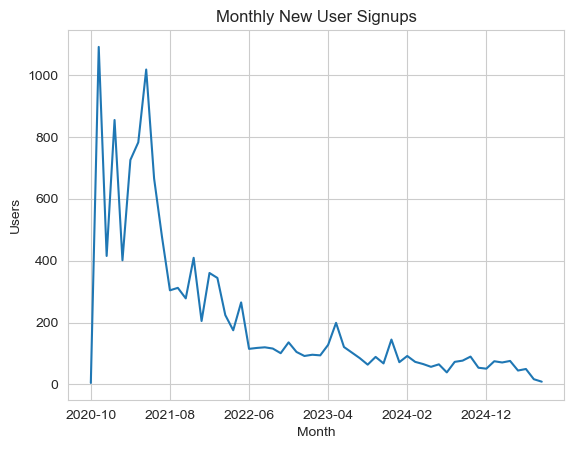

In [51]:
# new user sign ups over time

signups_trend = df.groupby('signup_month')['user_id'].nunique()
signups_trend.plot(kind='line', title='Monthly New User Signups', xlabel='Month', ylabel='Users')

### Insights:
* The majority of user sign-ups occurred during November and December 2020, coinciding with the platform's launch and the nationwide lockdown. This period likely boosted interest in online learning due to limited access to physical classes.
* A noticeable decline in sign-ups began around mid-August 2021, aligning with the easing of lockdown restrictions. As in-person classes resumed, many users may have shifted their preference back to offline learning environments.
* The downward trend in user acquisition continued over time, possibly indicating a shift in user behavior toward offline modes or reflecting challenges faced by the startup—such as financial constraints, reduced marketing efforts, or limited user engagement strategies.

<Axes: title={'center': 'Subscriptions Expiration Month'}, xlabel='Month', ylabel='Subscriptions'>

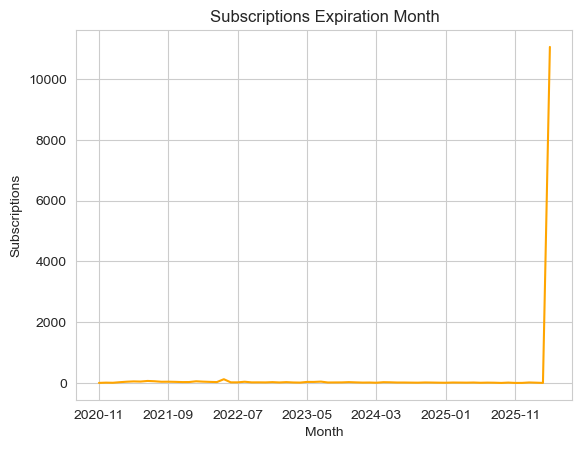

In [52]:
# subscriptions over time

subscriptions_trend = df.groupby('subscription_end')['user_id'].count()
subscriptions_trend.plot(kind='line', title='Subscriptions Expiration Month', xlabel='Month', ylabel='Subscriptions', color='orange')

### Insights:
* The plot reveals a significant spike in subscriptions set to expire around November 2025.
* This may correspond to users who opted for annual plans during a promotional offer, possibly launched as part of the startup's anniversary campaign.
* Note: The "Subscriptions" line is based on subscription_end, not the actual subscription start date. So it represents when users are expected to leave, not when they joined.

<Axes: title={'center': 'Monthly Signups vs Subscriptions'}>

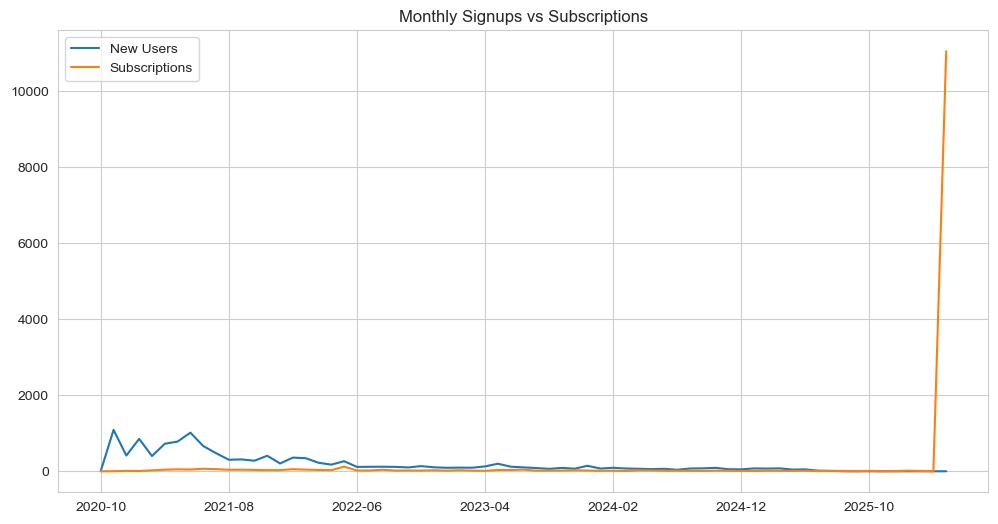

In [53]:
# Compare Subscriptions vs. Sign-Ups

combined = pd.DataFrame({
    'New Users': signups_trend,
    'Subscriptions': subscriptions_trend
}).fillna(0)

combined.plot(kind='line', figsize=(12,6), title='Monthly Signups vs Subscriptions')

### Insights:
* Most user signups happened between late 2020 and mid-2021.
* A large spike in subscription expirations appears in October 2025, which may indicate - batch of long-term subscriptions ending.

<Axes: title={'center': 'Subscriptions by Repeated vs One-Time'}, xlabel='Month', ylabel='Count'>

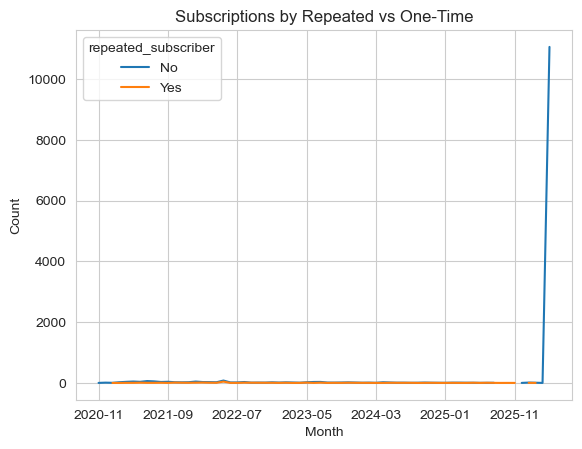

In [54]:
# Repeat vs One-time Subscribers Trend

repeat_subs = df.groupby(['subscription_end', 'repeated_subscriber'])['user_id'].count().unstack()
repeat_subs.plot(kind='line', title='Subscriptions by Repeated vs One-Time', xlabel='Month', ylabel='Count')

### Insights:
* Most subscriptions ending in earlier months were one-time.
* In October 2025, there’s a huge spike in one-time users — again suggesting expiration of their current plan around November 2025.
* Note: The subscription_end date is being used to group this chart, so it shows when the last subscription expires, not when users resubscribed.

<Axes: title={'center': 'Cumulative Growth'}>

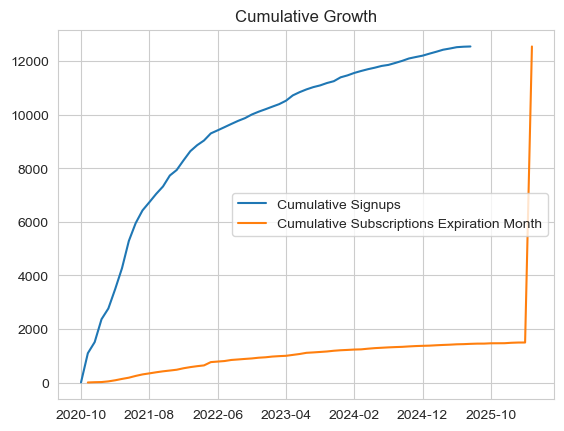

In [56]:
signups_cum = signups_trend.cumsum()
subscriptions_cum = subscriptions_trend.cumsum()

pd.DataFrame({
    'Cumulative Signups': signups_cum,
    'Cumulative Subscriptions Expiration Month': subscriptions_cum
}).plot(title='Cumulative Growth')

### Insights:
* Signups grew steadily between 2020 and 2023, then plateaued.
* Subscription expirations increased more slowly but jumped sharply showing expiration in the late 2025.
* The gap between cumulative signups and subscriptions shows users not all converted to subscribers.
* Note: The orange line is cumulative count of subscriptions ending, not new subscriptions. This reflects total churn potential over time.

### Conclusion:
* The data was cleaned and prepared by combining user information with subscription details, and new columns like `subscriptions` and `repeated_subscriber` were added to support deeper analysis.
* The insights showed that more than 90% of the users were from India.
* A significantly high number of intermediate-level dancers indicated that intermediate-level dancers are more inclined to invest in subscriptions to refine and elevate their skills further as artists.
* The data also showed that users with career or passion-driven motivations are more likely to invest in a subscription, aligning their intent with actionable commitment.
* More than 4000 users wished to become a **Choreographer** followed by the career option of **Freelancer or Professional Dancer**.
* 2.6% of the users were repeated subscribers and 1057 users had subscribed only once.
* Time-series analysis showed that most user sign-ups occurred during the platform’s launch in late 2020, likely due to the nationwide lockdown that encouraged online learning.
* A steady decline in sign-ups began after mid-2021, which aligns with the reopening of offline classes. This suggests that many users may have returned to physical dance studios or the platform faced challenges in user acquisition.
* A sharp increase in subscription expirations around November 2025 was observed, possibly due to a promotional annual plan offered during the startup’s anniversary. This spike represents the end of subscription periods, not the beginning.
* Overall, while the platform gained strong initial traction, user retention and growth appear to have slowed over time, highlighting the need for improved engagement or marketing strategies.

In [58]:
df.to_csv('updatedidalsuserdata.csv')